Link to dataset
https://archive.ics.uci.edu/ml/datasets/wine+quality

In [1]:

# 4. Relevant Information:

#    The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine.
#    For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].
#    Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables 
#    are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

#    These datasets can be viewed as classification or regression tasks.
#    The classes are ordered and not balanced (e.g. there are munch more normal wines than
#    excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent
#    or poor wines. Also, we are not sure if all input variables are relevant. So
#    it could be interesting to test feature selection methods. 

# 5. Number of Instances: red wine - 1599; white wine - 4898. 

# 6. Number of Attributes: 11 + output attribute
  
#    Note: several of the attributes may be correlated, thus it makes sense to apply some sort of
#    feature selection.

# 7. Attribute information:

#    For more information, read [Cortez et al., 2009].

#    Input variables (based on physicochemical tests):
#    1 - fixed acidity
#    2 - volatile acidity
#    3 - citric acid
#    4 - residual sugar
#    5 - chlorides
#    6 - free sulfur dioxide
#    7 - total sulfur dioxide
#    8 - density
#    9 - pH
#    10 - sulphates
#    11 - alcohol
#    Output variable (based on sensory data): 
#    12 - quality (score between 0 and 10)

# 8. Missing Attribute Values: None

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_red=pd.read_csv('winequality-red.csv',sep=';')

In [4]:
#eda
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#eda
df_red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#eda
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

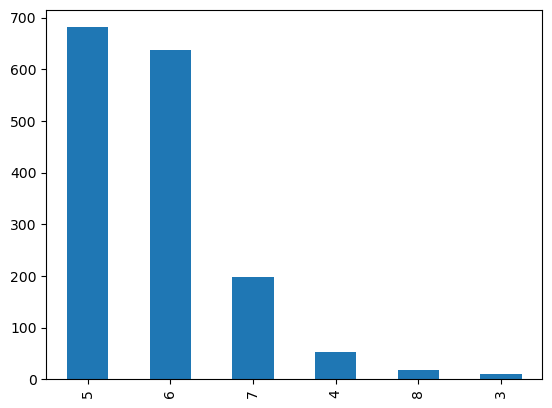

In [7]:
df_red['quality'].value_counts().plot(kind='bar')

<AxesSubplot:>

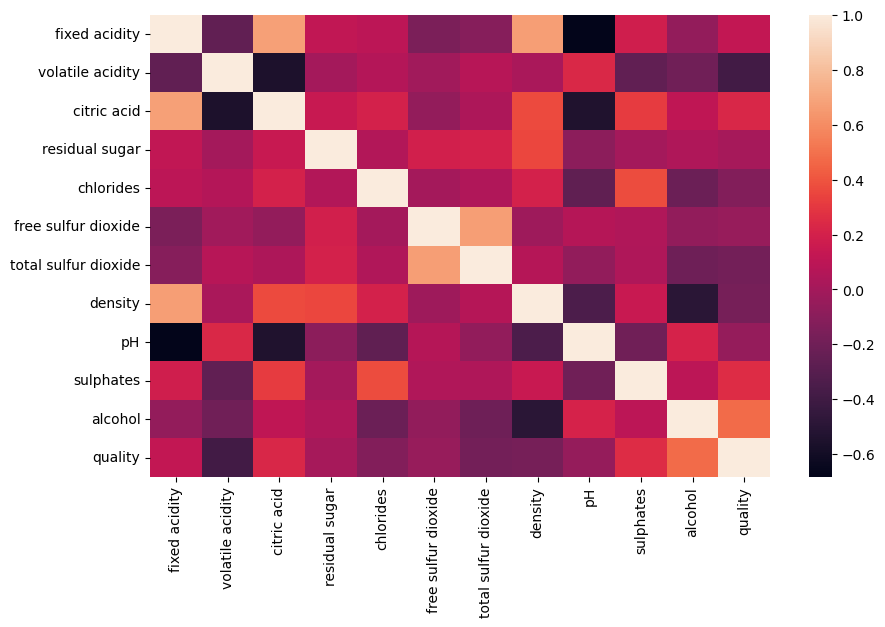

In [8]:
#show heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_red.corr(),annot=False)

In [9]:
#since high correlation, we apply PCA except quality
from sklearn.decomposition import PCA

pca=PCA(n_components=0.95)
X_red=df_red.drop('quality',axis=1)
y_red=df_red['quality']
X_red_pca=pca.fit_transform(X_red)

#split data
from sklearn.model_selection import train_test_split

X_train_red,X_test_red,y_train_red,y_test_red=train_test_split(X_red_pca,y_red,test_size=0.2,random_state=42)

### Regression problem

In [10]:
#catboost regressor
from catboost import CatBoostRegressor

model=CatBoostRegressor(iterations=1000,learning_rate=0.1,depth=5)
model.fit(X_train_red,y_train_red)

y_pred=model.predict(X_test_red)

0:	learn: 0.8015972	total: 132ms	remaining: 2m 11s
1:	learn: 0.7981682	total: 135ms	remaining: 1m 7s
2:	learn: 0.7943072	total: 137ms	remaining: 45.5s
3:	learn: 0.7910300	total: 139ms	remaining: 34.7s
4:	learn: 0.7884191	total: 142ms	remaining: 28.2s
5:	learn: 0.7862321	total: 144ms	remaining: 23.8s
6:	learn: 0.7842642	total: 146ms	remaining: 20.7s
7:	learn: 0.7826930	total: 148ms	remaining: 18.3s
8:	learn: 0.7803024	total: 149ms	remaining: 16.5s
9:	learn: 0.7793967	total: 151ms	remaining: 14.9s
10:	learn: 0.7786806	total: 153ms	remaining: 13.7s
11:	learn: 0.7775014	total: 154ms	remaining: 12.7s
12:	learn: 0.7764095	total: 156ms	remaining: 11.9s
13:	learn: 0.7757063	total: 159ms	remaining: 11.2s
14:	learn: 0.7740685	total: 161ms	remaining: 10.6s
15:	learn: 0.7732492	total: 163ms	remaining: 10s
16:	learn: 0.7723826	total: 165ms	remaining: 9.51s
17:	learn: 0.7717103	total: 167ms	remaining: 9.09s
18:	learn: 0.7703457	total: 169ms	remaining: 8.71s
19:	learn: 0.7689530	total: 171ms	remainin

In [11]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('MSE:',mean_squared_error(y_test_red,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test_red,y_pred)))
print('MAE:',mean_absolute_error(y_test_red,y_pred))

MSE: 0.6539417780415817
RMSE: 0.8086666668297771
MAE: 0.6269307618822771


In [12]:
#extra trees regressor
from sklearn.ensemble import ExtraTreesRegressor

model=ExtraTreesRegressor(n_estimators=100)
model.fit(X_train_red,y_train_red)

y_pred=model.predict(X_test_red)

print('MSE:',mean_squared_error(y_test_red,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test_red,y_pred)))
print('MAE:',mean_absolute_error(y_test_red,y_pred))

MSE: 0.6521549999999999
RMSE: 0.8075611431959812
MAE: 0.5473750000000001


In [13]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor(n_estimators=100)
model.fit(X_train_red,y_train_red)

y_pred=model.predict(X_test_red)

print('MSE:',mean_squared_error(y_test_red,y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test_red,y_pred)))
print('MAE:',mean_absolute_error(y_test_red,y_pred))


MSE: 0.6235434375000001
RMSE: 0.7896476666843257
MAE: 0.5840937500000001


### Classification problem

In [14]:
df_white=pd.read_csv('winequality-white.csv',sep=';')

In [15]:
df_white.shape

(4898, 12)

In [16]:
#apply pca except quality
pca=PCA(n_components=0.95)
X_white=df_white.drop('quality',axis=1)
y_white=df_white['quality']
X_white_pca=pca.fit_transform(X_white)

In [17]:
df_red_pca=pd.DataFrame(X_red_pca)

df_white_pca=pd.DataFrame(X_white_pca)

In [18]:
df_red_pca['wine_type']='red'
df_white_pca['wine_type']='white'

In [19]:
#combine red and white wine dataframes
df_all=pd.concat([df_red_pca,df_white_pca],axis=0)
df_all.head()

,0,1,wine_type
0,-13.224905,-2.023900,red
1,22.037724,4.408322,red
2,7.162673,-2.501461,red
3,13.430063,-1.951122,red
4,-13.224905,-2.023900,red


In [20]:
df_all["wine_type"].value_counts()

white    4898
red      1599
Name: wine_type, dtype: int64

In [21]:
#train test split
X=df_all.drop('wine_type',axis=1)
y=df_all['wine_type']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#balance data in train set
from sklearn.utils import resample

df_train=pd.concat([X_train,y_train],axis=1)

df_train['wine_type'].value_counts()


white    3939
red      1258
Name: wine_type, dtype: int64

In [22]:

df_train_majority=df_train[df_train['wine_type']=='white']

df_train_minority=df_train[df_train['wine_type']=='red']

df_train_minority_upsampled=resample(df_train_minority,replace=True,n_samples=3939,random_state=42)

df_train_upsampled=pd.concat([df_train_majority,df_train_minority_upsampled],axis=0)

df_train_upsampled['wine_type'].value_counts()

white    3939
red      3939
Name: wine_type, dtype: int64

In [23]:
X_train_upsampled=df_train_upsampled.drop('wine_type',axis=1)
y_train_upsampled=df_train_upsampled['wine_type']

<AxesSubplot:xlabel='pc1', ylabel='pc2'>

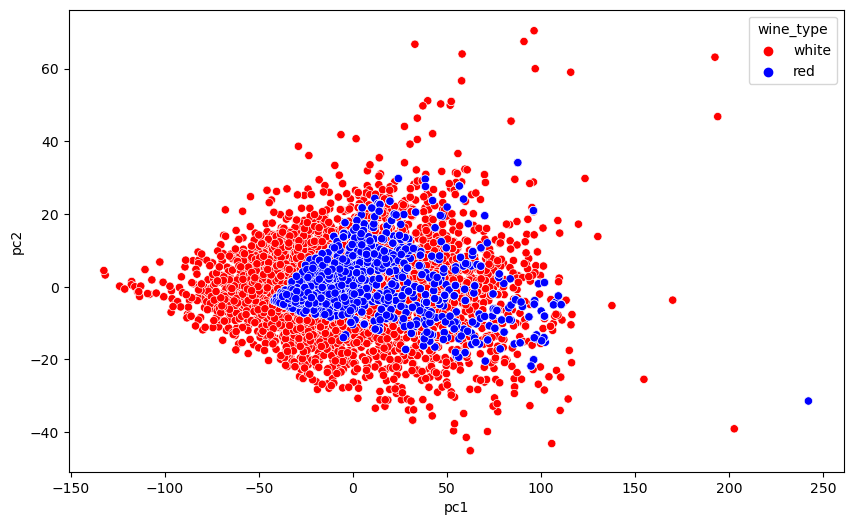

In [24]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train_upsampled)

df_pca = pd.DataFrame(X_train_pca, columns=['pc1', 'pc2'])
df_pca['wine_type'] = y_train_upsampled.values  # Use .values to avoid reindexing error

# Plot the clusters and label them colorwise (red for red wine and blue for white wine)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pc1', y='pc2', hue='wine_type', data=df_pca, palette=['red', 'blue'])


In [25]:
#catboost classifier
from catboost import CatBoostClassifier

model=CatBoostClassifier(iterations=1000,learning_rate=0.1,depth=5, verbose=False)

model.fit(X_train_upsampled,y_train_upsampled)

y_pred=model.predict(X_test)

from sklearn.metrics import classification_report

print('Classification Report:\n',classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

         red       0.56      0.71      0.62       341
       white       0.88      0.80      0.84       959

    accuracy                           0.78      1300
   macro avg       0.72      0.75      0.73      1300
weighted avg       0.80      0.78      0.78      1300



In [26]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train_upsampled,y_train_upsampled)

y_pred=model.predict(X_test)

print('Classification Report:\n',classification_report(y_test,y_pred))


Classification Report:
               precision    recall  f1-score   support

         red       0.67      0.65      0.66       341
       white       0.88      0.89      0.88       959

    accuracy                           0.82      1300
   macro avg       0.77      0.77      0.77      1300
weighted avg       0.82      0.82      0.82      1300



In [27]:
#svm
from sklearn.svm import SVC

model=SVC()

model.fit(X_train_upsampled,y_train_upsampled)

y_pred=model.predict(X_test)

print('Classification Report:\n',classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

         red       0.44      0.72      0.55       341
       white       0.87      0.67      0.76       959

    accuracy                           0.68      1300
   macro avg       0.66      0.70      0.65      1300
weighted avg       0.76      0.68      0.70      1300



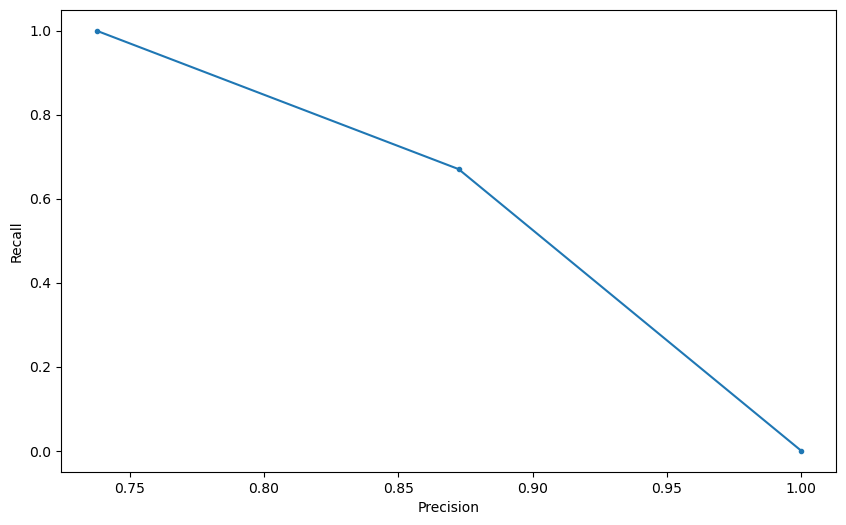

In [28]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder

# Convert the predicted labels to numeric values
label_encoder = LabelEncoder()
y_pred_numeric = label_encoder.fit_transform(y_pred)

# Convert the true labels to binary format
y_true_binary = label_encoder.transform(y_test)

precision, recall, thresholds = precision_recall_curve(y_true_binary, y_pred_numeric)

plt.figure(figsize=(10, 6))
plt.plot(precision, recall, marker='.')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.show()


At the start of the curve, with recall equal to 1, the precision is 0.5. This means that when the model identifies all positive instances correctly (high recall), it has a precision of 0.5, indicating that there are some false positives.

As the recall decreases, the precision gradually increases until it reaches a value of 1 at the end of the curve. This implies that the model becomes more conservative in its predictions, reducing the number of false positives but potentially missing some true positives.

This type of curve is typical for binary classification problems, especially when dealing with imbalanced datasets. It provides insights into how the model's performance changes as the decision threshold for classifying positive instances is varied.